In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time

In [3]:
import kid_readout.roach.heterodyne
import kid_readout.utils.sweeps

In [4]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [5]:
ri.set_fft_gain(4)
ri.set_lo(830.)
ri.set_dac_atten(3)

In [6]:
res = np.load('/home/gjones/2015-08-06-dense-64-res-lo-830.npy')

In [7]:
ri.set_tone_freqs(res[::2],nsamp=2**16)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 750.25   ,  777.15625,  778.40625,  779.5625 ,  780.8125 ,
        781.84375,  785.15625,  801.84375,  819.71875,  821.53125,
        823.     ,  836.5    ,  847.96875,  863.59375,  865.21875,
        866.4375 ,  869.15625,  870.4375 ,  875.4375 ,  876.71875,
        882.15625,  883.78125,  890.3125 ,  891.6875 ,  895.5625 ,
        909.4375 ,  920.28125,  921.46875,  928.375  ,  934.5625 ,
        935.78125,  945.4375 ])

In [8]:
ri.select_fft_bins(range(32))

In [58]:
_7[ri.readout_selection[5]]

869.15625

In [169]:
d,addr = ri.get_data(64)

detected mcnt overflow None 24851 0 65536 0 8624 24851


In [170]:
d.shape

(262144, 32)

In [171]:
fold = d.reshape((-1,256,32))

In [172]:
folded = fold.mean(0)
folded = folded - folded[:50,:].mean(0)

In [173]:
folded.shape

(256, 32)

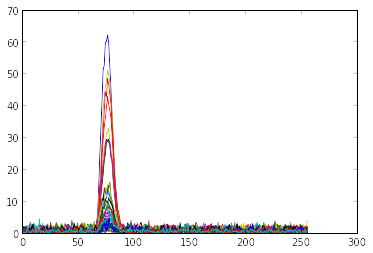

In [174]:
blah = plot(np.abs(folded.imag)+np.abs(folded.real))
#xlim(150,200)
#ylim(0,20)

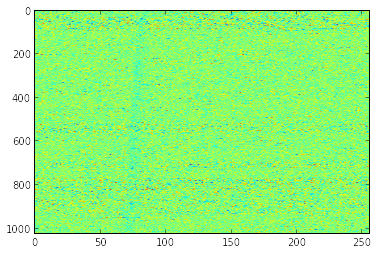

In [175]:
imshow(fold[:,:,4].real,aspect='auto')

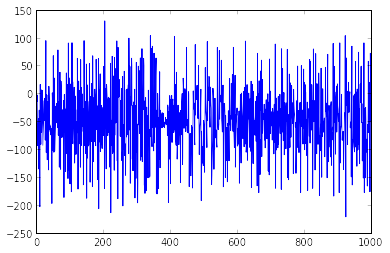

In [54]:
plot(d.imag[:1000,5])

In [18]:
(2**14/512e6)*256

0.008192

In [19]:
import kid_readout.equipment.led_controller
reload(kid_readout.equipment.led_controller)

<module 'kid_readout.equipment.led_controller' from '/home/gjones/readout/kid_readout/kid_readout/equipment/led_controller.pyc'>

In [167]:
led = kid_readout.equipment.led_controller.LedController(baudrate=19200)

In [168]:
led.sendget('2,5,8204,200',interchar_delay=0.2)

'\nRow 2, Column 5\r\nPeriod: 8204 microseconds\r\nPulse Duration: 200 microseconds\r\nTimer initialized.\r\n'

In [158]:
led.ser.inWaiting()

0

In [153]:
led.ser.read(100)

''

In [78]:
led.ser.close()

In [59]:
data = np.empty((7,4,32,2**18),dtype='complex')
rows = np.arange(1,8)
cols = np.arange(2,6)
for irow,row in enumerate(rows):
    for icol,col in enumerate(cols):
        print led.sendget(('%d,%d,8204,200' % (row,col)),interchar_delay=0.2)
        time.sleep(1)
        print led.ser.read(100)
        d,addr = ri.get_data(64)
        data[irow,icol,:,:] = d.T

Row 1, Column 2
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


detected mcnt overflow None 24851 0 65536 0 26384 24851
Row 1, Column 3
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


detected mcnt overflow None 24851 0 65536 0 31360 24851
Row 1, Column 4
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 1, Column 5
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 2, Column 2
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 2, Column 3
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 2, Column 4
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 2, Column 5
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


Row 3, Column 2
Period: 8204 microseconds
Pulse Duration: 200 microseconds
Timer initialized.


detected mcnt overflow N

In [60]:
2

2

In [61]:
data.shape

(7, 4, 32, 262144)

In [62]:
folded = data.reshape((7,4,32,-1,256))

In [63]:
fold = folded.mean(3)

In [64]:
fold.shape

(7, 4, 32, 256)

In [65]:
fab = np.abs(fold.real-np.median(fold.real,axis=3)[:,:,:,None])+np.abs(fold.imag-np.median(fold.imag,axis=3)[:,:,:,None])

In [66]:
fab.shape

(7, 4, 32, 256)

In [67]:
np.save('/home/gjones/2015-08-07-dense-array-led-test.npy',fab)

In [68]:
pk = fab.max(3)

In [69]:
pk.shape

(7, 4, 32)

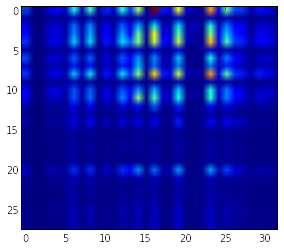

In [70]:
imshow(pk.reshape((-1,32)))

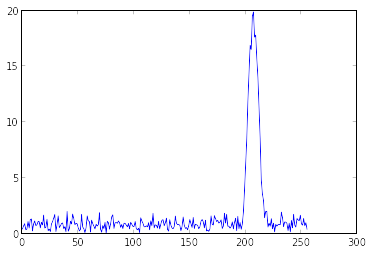

In [71]:
plot(fab[2,2,4,:])

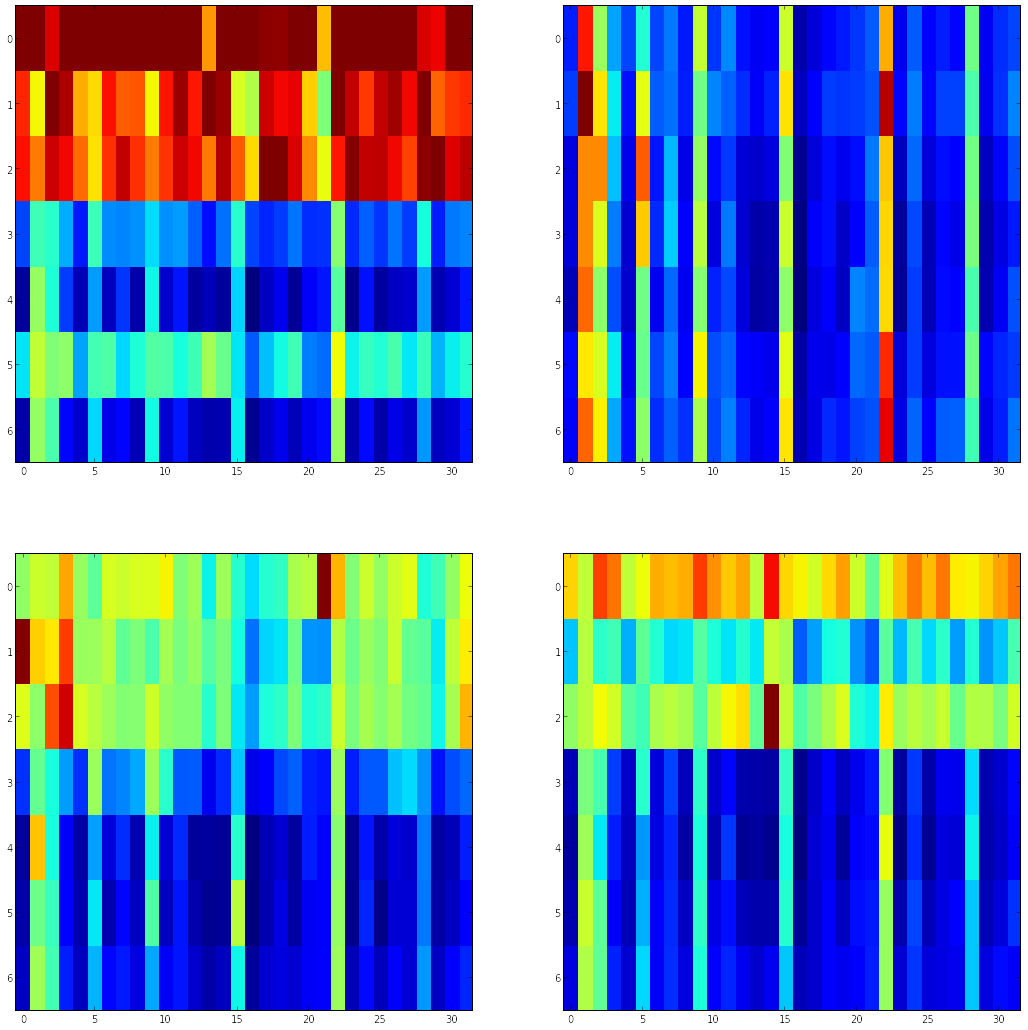

In [72]:
fig,axs = subplots(2,2,figsize=(18,18))
for k in range(4):
    ax = axs.flatten()[k]
    ax.imshow((pk[:,k,:])/pk.max(0).max(0),aspect='auto',interpolation='nearest')#,clim=(pk.min(),pk.max()))
    

In [218]:
7*6*5*4*3*2*4*3*2

120960

<matplotlib.colorbar.Colorbar instance at 0x7fec11f016c8>

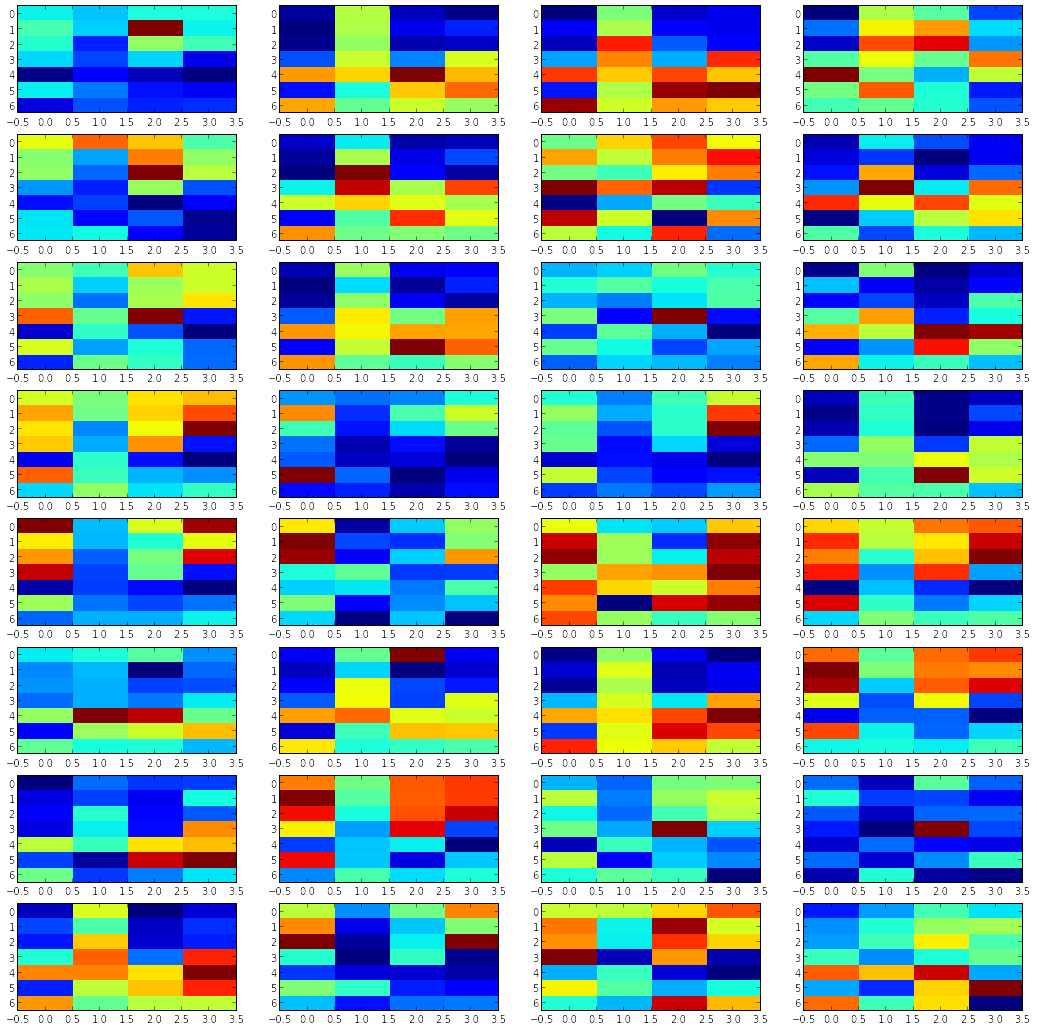

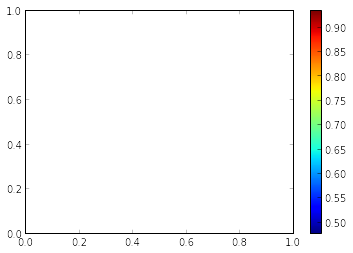

In [73]:
fig,axs = subplots(8,4,figsize=(18,18))
for n in range(32):
    ax = axs.flatten()[n]
    im = ax.imshow((pk[:,:,n]/np.median(pk,axis=2)),aspect='auto',interpolation='nearest')#,clim=(-3,0))
figure()
colorbar(im)

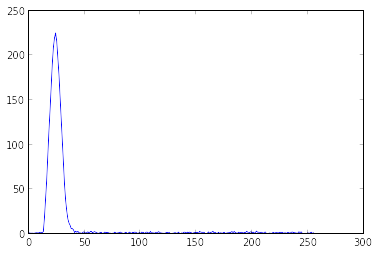

In [74]:
plot(fab[0,0,16,:])

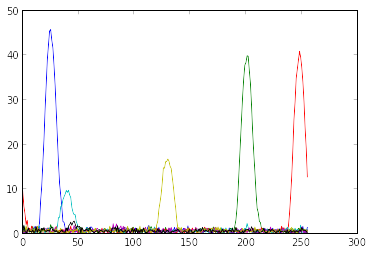

In [75]:
plot(fab[:,0,0,:].T)

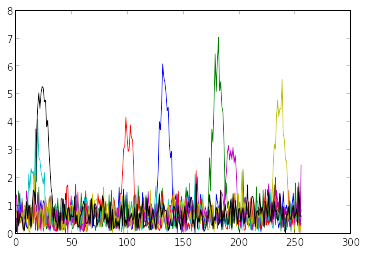

In [76]:
plot(fab[:,1,0,:].T)

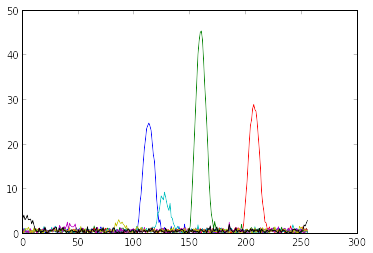

In [77]:
plot(fab[:,2,0,:].T)

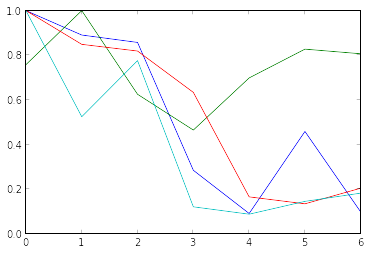

In [121]:
plot(pk[:,:,10]/pk[:,:,10].max(0))

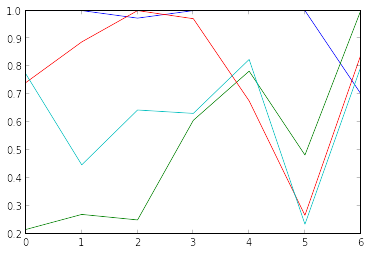

In [85]:
plot(pk[:,:,3]/pk[:,:,3].max(1)[:,None])

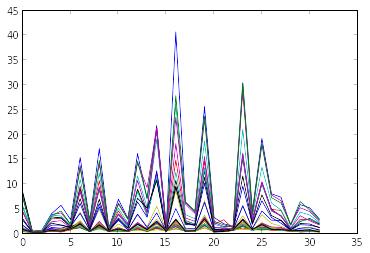

In [145]:
blah =plot((pkr).T/np.median(pkr))

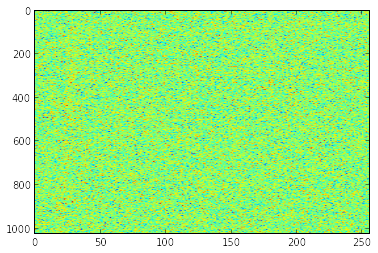

In [141]:
imshow(folded[0,0,1,:,:].real,aspect='auto')

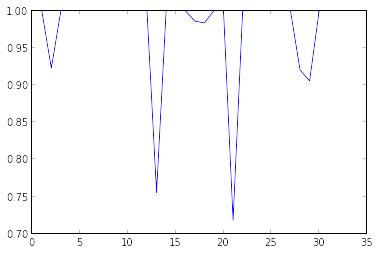

In [92]:
plot(pk[0,0,:]/pk.max(0).max(0))

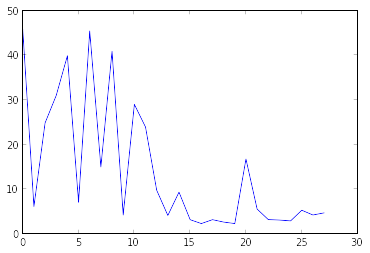

In [97]:
plot(pk[:,:,0].flatten())

In [98]:
pkr= pk.reshape((-1,32))

In [100]:
order  = pkr.argsort(axis=0)

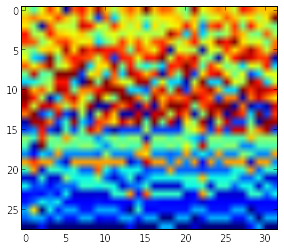

In [105]:
imshow(order)

In [106]:
order2= pkr.argsort(axis=1)

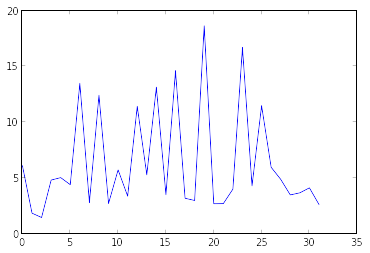

In [118]:
plot(pkr[1,:])

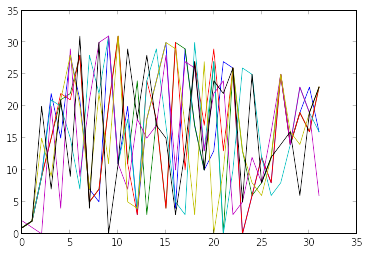

In [151]:
plot(order2[::4,:].T)

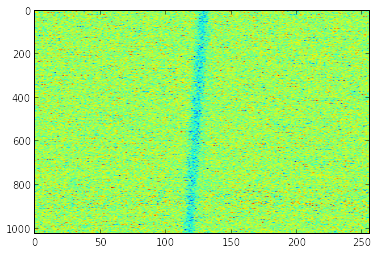

In [177]:
imshow(folded[0,0,4,:,:].real,aspect='auto')

In [239]:
data.shape

(7, 4, 32, 262144)

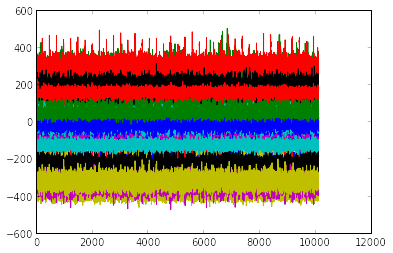

In [119]:
blah = plot(data[0,0,:,154200:164300].real.T)